## 실습리포트8



*   이름: 유성민
*   학과: 생명환경공학전공
*   학번: 2019110881



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
from keras import Sequential
from keras.layers import Dense


### MNIST 데이터셋

- 문제: 손글씨 데이터셋을 이용해 손글씨 데이터를 분류하는 모델 만들기

- 실행결과: 오차 0.078, 정확도 0.978 로 은닉층 1개인 모델로 상당히 높은 정확도를 가지는 것을 볼 수 있다.

In [ ]:
#데이터셋 로드

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


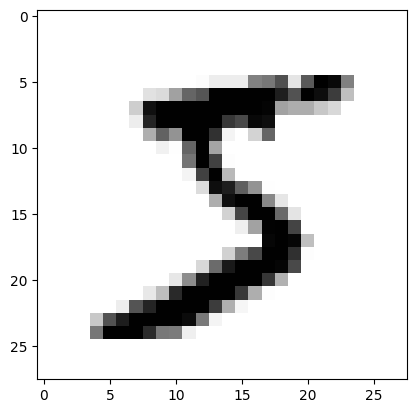

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
#정규화

x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
#모델 정의

model=Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
#모델 컴파일

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 훈련

hist = model.fit(x_train, y_train,
               validation_data=(x_test, y_test),
               epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2596 - accuracy: 0.9262 - val_loss: 0.1291 - val_accuracy: 0.9630
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1122 - accuracy: 0.9664 - val_loss: 0.1049 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0768 - accuracy: 0.9771 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0576 - accuracy: 0.9824 - val_loss: 0.0802 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0768 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.0857 - val_accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0832 - val_accuracy

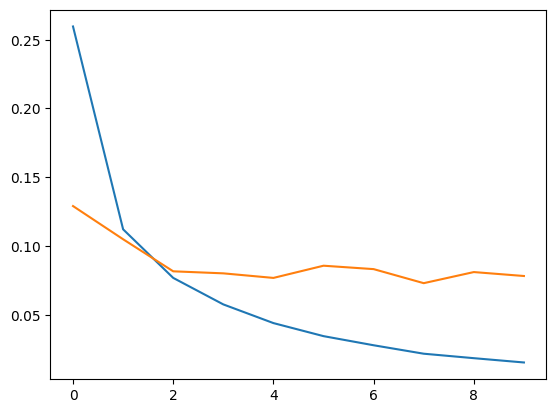

In [ ]:
#평가

loss= hist.history['loss']
val_loss=hist.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.show()

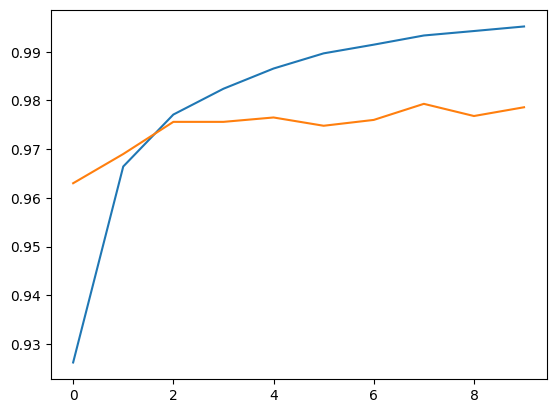

In [ ]:
#모델평가

acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

plt.plot(acc)
plt.plot(val_acc)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0782 - accuracy: 0.9786


[0.07822655886411667, 0.978600025177002]


### Fashion mnist

- 문제: 패션데이터셋을 이용해 옷 분류하기

- 실행결과: 은닉층 1개인 모델로는 정확도 0.89로, 성능이 90%가 되지 않았다. 은닉층을 하나 추가해도 90%를 넘지 않았으며, 이 이상 은닉층을 추가하면 과대적합이 발생한다.

In [ ]:
#데이터생성

fashion=keras.datasets.fashion_mnist
(f_x_train, f_y_train), (f_x_test, f_y_test) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#확인
print(f_x_train.shape)
print(f_y_test.shape)

(60000, 28, 28)
(10000,)


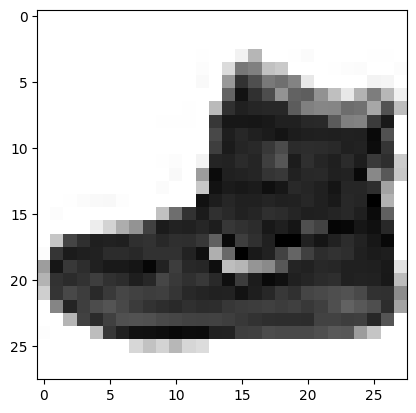

In [ ]:
plt.imshow(f_x_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
#정규화

f_x_train, f_x_test = f_x_train/255.0, f_x_test/255.0

In [ ]:
#모델 정의

f_model = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
#모델 컴파일

f_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#모델 훈련

f_hist = f_model.fit(f_x_train, f_y_train,
                     validation_data=(f_x_test, f_y_test),
                     epochs=30, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4959 - accuracy: 0.8254 - val_loss: 0.4336 - val_accuracy: 0.8483
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3737 - accuracy: 0.8654 - val_loss: 0.3945 - val_accuracy: 0.8583
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3352 - accuracy: 0.8773 - val_loss: 0.3964 - val_accuracy: 0.8582
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3118 - accuracy: 0.8858 - val_loss: 0.3558 - val_accuracy: 0.8692
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2936 - accuracy: 0.8928 - val_loss: 0.3620 - val_accuracy: 0.8711
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2788 - accuracy: 0.8980 - val_loss: 0.3607 - val_accuracy: 0.8719
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2660 - accuracy: 0.9011 - val_loss: 0.3538 - val_accurac

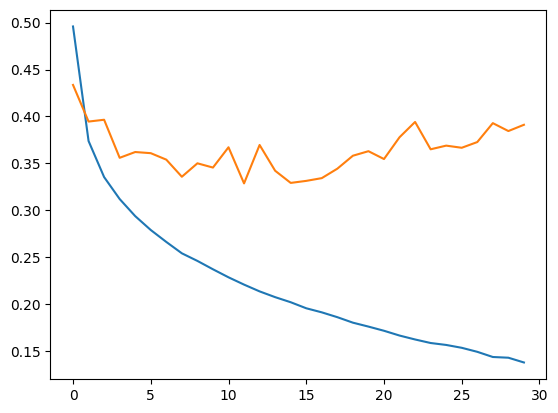

In [ ]:
#평가

f_loss= f_hist.history['loss']
f_val_loss=f_hist.history['val_loss']
plt.plot(f_loss)
plt.plot(f_val_loss)
plt.show()

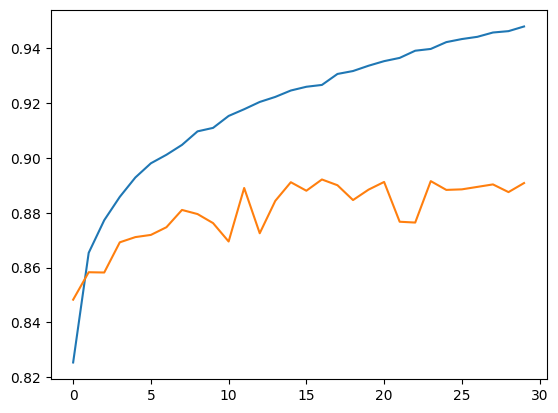

In [ ]:
#모델평가

f_acc=f_hist.history['accuracy']
f_val_acc=f_hist.history['val_accuracy']

plt.plot(f_acc)
plt.plot(f_val_acc)
plt.show()

In [ ]:
f_model.evaluate(f_x_test, f_y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8908


[0.3910326659679413, 0.8907999992370605]

In [ ]:
#모델 재정의 - 은닉층을 2층으로

f2_model = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
#모델 컴파일

f2_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#모델 훈련

f2_hist = f2_model.fit(f_x_train, f_y_train,
                     validation_data=(f_x_test, f_y_test),
                     epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4856 - accuracy: 0.8268 - val_loss: 0.4123 - val_accuracy: 0.8516
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3644 - accuracy: 0.8676 - val_loss: 0.3953 - val_accuracy: 0.8548
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3286 - accuracy: 0.8783 - val_loss: 0.3599 - val_accuracy: 0.8675
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3066 - accuracy: 0.8869 - val_loss: 0.3496 - val_accuracy: 0.8752
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2882 - accuracy: 0.8921 - val_loss: 0.3397 - val_accuracy: 0.8733
Epoch 6/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2754 - accuracy: 0.8961 - val_loss: 0.3300 - val_accuracy: 0.8833
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2637 - accuracy: 0.9015 - val_loss: 0.3563 - val_accuracy

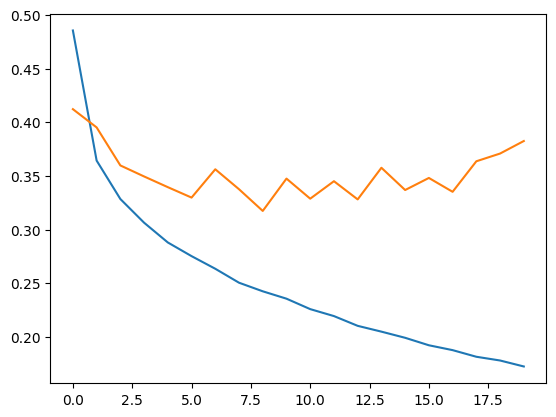

In [ ]:
#평가

f2_loss= f2_hist.history['loss']
f2_val_loss=f2_hist.history['val_loss']
plt.plot(f2_loss)
plt.plot(f2_val_loss)
plt.show()

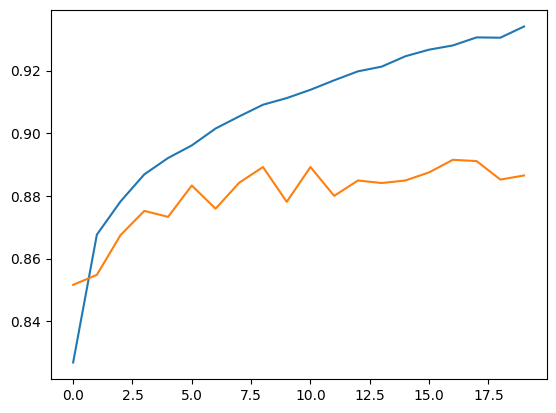

In [ ]:
#모델평가

f2_acc=f2_hist.history['accuracy']
f2_val_acc=f2_hist.history['val_accuracy']

plt.plot(f2_acc)
plt.plot(f2_val_acc)
plt.show()

In [ ]:
f2_model.evaluate(f_x_test, f_y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.8865


[0.3826383650302887, 0.8865000009536743]